In [1]:
pwd

"C:\\Users\\Ro'aa Al-mahdi\\Desktop\\fake"

In [2]:
import pandas as pd

In [3]:
real = pd.read_csv('real.csv')
fake = pd.read_csv('fake.csv')
extra_data= pd.read_csv ('fake_news_detection.csv')

In [4]:
extra_data.shape

(1606, 5)

In [5]:
extra_data[extra_data['title'].duplicated()].shape

(424, 5)

In [6]:
#extra_data= extra_data.drop_duplicates(['title'])

In [7]:
extra_data.shape

(1606, 5)

In [8]:
extra_data['site'].value_counts()

breitbart         761
cnn               682
infowars           87
bbc                52
washingtonpost     24
Name: site, dtype: int64

In [9]:
is_true1=(extra_data['site']=='cnn')
is_true2=(extra_data['site']=='bbc')
is_true3=(extra_data['site']=='washingtonpost')
is_false1=(extra_data['site']=='breitbart')
is_false2=(extra_data['site']=='infowars')

In [10]:
extra_data.loc[is_true1,'class']='real'
extra_data.loc[is_true2,'class']='real'
extra_data.loc[is_true3,'class']='real'
extra_data.loc[is_false1,'class']='fake'
extra_data.loc[is_false2,'class']='fake'

In [11]:
extra_data.head()

,link,published,text,title,site,class
0,http://edition.cnn.com/2020/08/19/uk/police-of...,2020-08-19T00:00:00,London (CNN) A British police officer needed t...,Police officer freed by firefighters after get...,cnn,real
1,http://edition.cnn.com/2020/08/21/business/bre...,2020-08-21T00:00:00,London (CNN Business) The latest round of trad...,UK-EU trade talks are going backward and time ...,cnn,real
2,http://edition.cnn.com/2019/11/21/us/2019-in-r...,2019-11-21T00:00:00,(CNN) Here is a look back at the events of 201...,2019 In Review Fast Facts,cnn,real
3,http://edition.cnn.com/2020/08/12/business/ben...,2020-08-12T00:00:00,"In a series of tweets Tuesday, the politically...",Ben & Jerry's takes on UK government's handlin...,cnn,real
4,http://edition.cnn.com/2020/08/21/entertainmen...,2020-08-21T00:00:00,London (CNN) Musician Taylor Swift has donated...,Taylor Swift donates to London student Vitoria...,cnn,real


In [12]:
df= pd.concat([real,fake,extra_data],sort=False).reset_index(drop = True)

In [13]:
df=df.drop(['link','site','published','Unnamed: 0','title'],axis = 1)

In [14]:
df['class'].value_counts()

real    1824
fake    1483
Name: class, dtype: int64

In [15]:
df.shape

(3307, 2)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(3181, 2)

In [18]:
df[df.duplicated(['text'])].shape

(500, 2)

In [19]:
df= df.drop_duplicates(['text'])

In [20]:
df.shape

(2681, 2)

In [21]:
df['class'].value_counts()

real    1620
fake    1061
Name: class, dtype: int64

In [22]:
from sklearn.utils import shuffle
df=shuffle(df)
df=df.reset_index(drop=True)

# sentimental analysis of each class using 'textblob'

In [23]:
all_real=df.loc[df['class'] == 'real']
all_fake=df.loc[df['class'] == 'fake']

In [24]:
import textblob
from textblob import TextBlob

article_polarity_real = pd.DataFrame(columns=[ "sentiment"])

def senti(x):
    return TextBlob(x).sentiment.polarity
article_polarity_real['sentiment']= all_real["text"].apply(senti)

In [25]:
article_polarity_fake = pd.DataFrame(columns=[ "sentiment"])

def senti(x):
    return TextBlob(x).sentiment.polarity
article_polarity_fake['sentiment']= all_fake["text"].apply(senti)


In [26]:
import statistics
print(statistics.mean(article_polarity_real["sentiment"]))
print(statistics.mean(article_polarity_fake["sentiment"]))

0.0823316458564354
0.047022185744375694


C:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-1, 1)

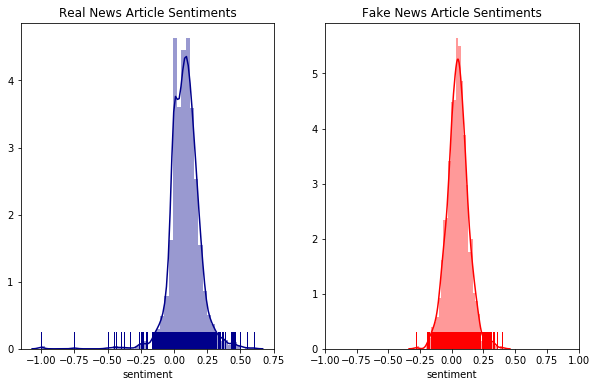

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(article_polarity_real["sentiment"], ax = ax[0], color = "darkblue", rug = True,).set_title("Real News Article Sentiments")
sns.distplot(article_polarity_fake["sentiment"], ax = ax[1], color = "red", rug = True).set_title("Fake News Article Sentiments")
plt.xlim(-1, 1)

class
fake    1061
real    1620
Name: text, dtype: int64


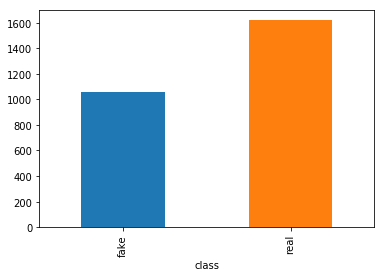

In [28]:
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind='bar')
plt.show()

# Due to the impalanced classes, we need an up-sampling method, but the text have to be transferred to numerical representation firstly

In [29]:
df.head()

,text,class
0,If you don't know artist Yayoi Kusama by her b...,real
1,Millions of Americans are in mourning after ne...,fake
2,The second wave of riots is here. Escalating v...,fake
3,New York (CNN Business) Facebook on Thursday l...,real
4,"Appearing Friday on CNN, Dr. Rob Davidson said...",fake


# normalizing case

In [30]:
for column in df.columns:
    df[column] = df[column].str.lower() 

# Remove Punctuation

In [31]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
for column in df.columns:
    df[column] = df[column].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~«‘’“”–—]','')

# Remove stopwords

In [33]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english', 'arabic'))

In [34]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [35]:
df.head()

,text,class
0,dont know artist yayoi kusama brightlycolored ...,real
1,millions americans mourning news broke afterno...,fake
2,second wave riots escalating violence portland...,fake
3,new york cnn business facebook thursday launch...,real
4,appearing friday cnn dr rob davidson said unli...,fake


# Visualizing most frequent words using 'wordcloud'

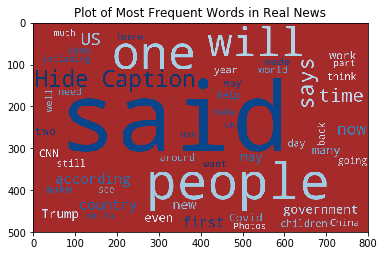

In [36]:
import wordcloud
from wordcloud import WordCloud

all_words=' '.join([text for text in all_real.text])
t_wc = WordCloud(width=800,height=500,max_words=50,relative_scaling=1,background_color ='brown',colormap="Blues",
                 normalize_plurals=False).generate(all_words)

plt.imshow(t_wc)
plt.title("Plot of Most Frequent Words in Real News")
plt.show()

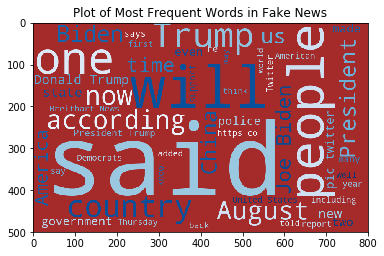

In [37]:
all_words=' '.join([text for text in all_fake.text])
t_wc = WordCloud(width=800,height=500,max_words=50,relative_scaling=1,background_color ='brown',colormap="Blues",
                 normalize_plurals=False).generate(all_words)

plt.imshow(t_wc)
plt.title("Plot of Most Frequent Words in Fake News")
plt.show()

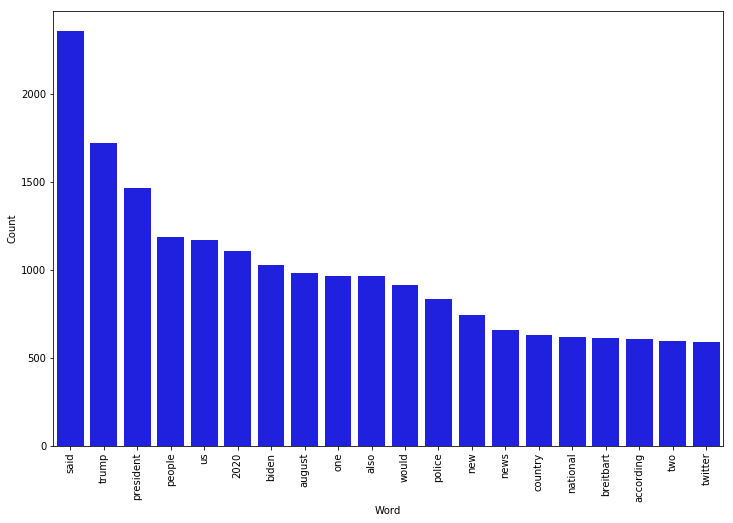

In [38]:
import nltk
from nltk import tokenize

#Tokenize a string on whitespace (space, tab, newline)
token_space=tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    #using nlargest() to get the word with most high frequency 
    # n is the number of value to select
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

counter(df[df['class'] == 'fake'], 'text', 20)

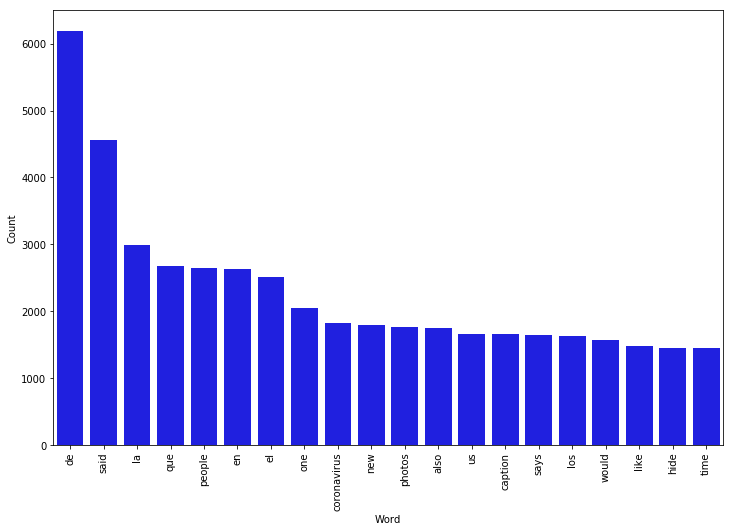

In [39]:
counter(df[df['class'] == 'real'], 'text', 20)

In [40]:
df.shape

(2681, 2)

In [41]:
df['class'] = df['class'].map({'fake':1 ,'real':0})

In [42]:
df['class'].head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

## Split the dataset into training and testing sets.

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
X = df['text']
y = df['class']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Let’s initialize a TfidfVectorizer. A TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.
### Then we will apply multible algorithms, starting with Support Vector Classifier.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
                      ('clf', LinearSVC()),
                    ])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('clf', LinearSVC())])

In [45]:
predictions = text_clf.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8528864059590316
[[287  37]
 [ 42 171]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       324
           1       0.82      0.80      0.81       213

    accuracy                           0.85       537
   macro avg       0.85      0.84      0.85       537
weighted avg       0.85      0.85      0.85       537



In [60]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[288,  36],
       [ 44, 169]], dtype=int64)

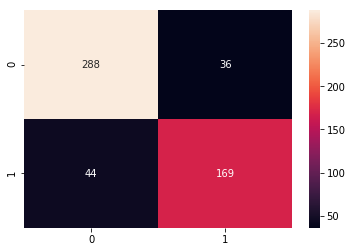

In [61]:
import numpy as np
labels = np.array([['288',  '36'],[ '44', '169']])
sns.heatmap(cm, annot=labels, fmt = '')
plt.show()

#  Next, we will try a NaiveBayesClassifier

In [63]:
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
                      ('clf', MultinomialNB()),
                    ])
text_clf.fit(X_train, y_train)

nb = MultinomialNB()


In [64]:
predictions = text_clf.predict(X_test)

In [65]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7821229050279329
[[304  20]
 [ 97 116]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       324
           1       0.85      0.54      0.66       213

    accuracy                           0.78       537
   macro avg       0.81      0.74      0.75       537
weighted avg       0.80      0.78      0.77       537



In [66]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[304,  20],
       [ 97, 116]], dtype=int64)

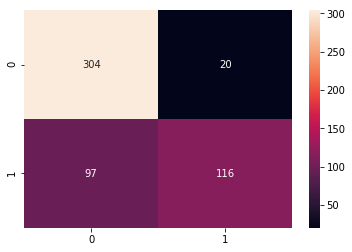

In [67]:
labels = np.array([['304',  '20'],[ '97', '116']])
sns.heatmap(cm, annot=labels, fmt = '')
plt.show()

#  Finally, we will try a PassiveAggressiveClassifier

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
                      ('clf', PassiveAggressiveClassifier(max_iter=50)),
                    ])
text_clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('clf', PassiveAggressiveClassifier(max_iter=50))])

In [74]:
predictions = text_clf.predict(X_test)

In [75]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.851024208566108
[[288  36]
 [ 44 169]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       324
           1       0.82      0.79      0.81       213

    accuracy                           0.85       537
   macro avg       0.85      0.84      0.84       537
weighted avg       0.85      0.85      0.85       537



In [76]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[288,  36],
       [ 44, 169]], dtype=int64)

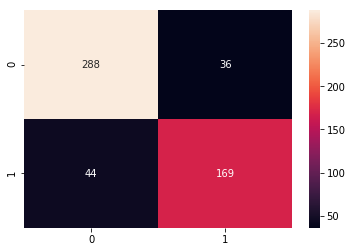

In [77]:
labels = np.array([['288',  '36'],[ '44', '169']])
sns.heatmap(cm, annot=labels, fmt = '')
plt.show()